**Ana Helena Marcacini RA: 20.01305-0**

**Enrico Giannobile RA: 19.00610-0**

In [2]:
# Instalar a Biblioteca Ultralitycs AQUI !
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 17.6 MB/s eta 0:00:00


In [4]:
import ultralytics
# Importar a Biblioteca YOLO AQUI !

from ultralytics import YOLO
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# Importar OPENCV AQUI!

import cv2

In [5]:
model = YOLO("model.pt")# INSTANCIAR O MODELO AQUI

In [6]:
img = cv2.imread('people.jpg')

In [8]:
# cv2_imshow(img)

In [9]:
People_results = model.predict('/content/people.jpg')# REALIZE A INFERENCIA AQUI !


image 1/1 /content/people.jpg: 448x640 3 FACEs, 327.6ms
Speed: 21.2ms preprocess, 327.6ms inference, 31.8ms postprocess per image at shape (1, 3, 448, 640)


In [20]:
results = People_results[0]
results.names

{0: 'FACE'}

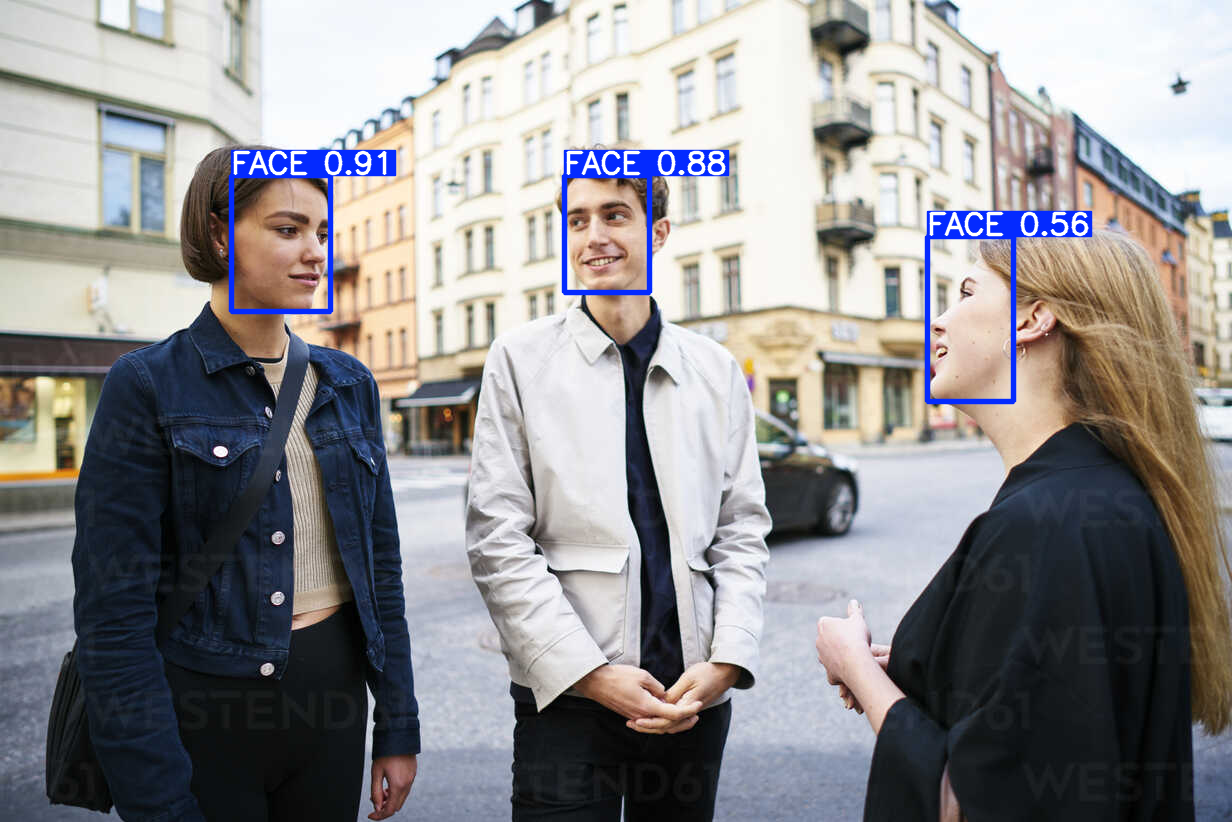

In [11]:
cv2_imshow(People_results[0].plot())

In [12]:
boxes = People_results[0].boxes# OBTENHA OS BBOX AQUI

In [13]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0.])
conf: tensor([0.9055, 0.8769, 0.5601])
data: tensor([[2.3170e+02, 1.7521e+02, 3.3094e+02, 3.1164e+02, 9.0550e-01, 0.0000e+00],
        [5.6414e+02, 1.7587e+02, 6.4976e+02, 2.9233e+02, 8.7692e-01, 0.0000e+00],
        [9.2731e+02, 2.3653e+02, 1.0137e+03, 4.0150e+02, 5.6009e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (822, 1232)
shape: torch.Size([3, 6])
xywh: tensor([[281.3207, 243.4273,  99.2436, 136.4246],
        [606.9495, 234.0972,  85.6233, 116.4617],
        [970.5045, 319.0153,  86.3978, 164.9762]])
xywhn: tensor([[0.2283, 0.2961, 0.0806, 0.1660],
        [0.4927, 0.2848, 0.0695, 0.1417],
        [0.7877, 0.3881, 0.0701, 0.2007]])
xyxy: tensor([[ 231.6989,  175.2150,  330.9425,  311.6396],
        [ 564.1379,  175.8663,  649.7612,  292.3280],
        [ 927.3057,  236.5271, 1013.7034,  401.5034]])
xyxyn: tensor([[0.1881, 0.2132, 0.2686, 0.3791],
        [0.4579, 0.2139, 0.5274, 0.3556]

In [25]:
##### ESCREVA A FUNÇÃO ########

def CROP(img, boxes):
  ''' Função que retorna uma lista obtendo todas
      as faces encontradas na imagem.'''

  cropped_faces = []
  boxes =boxes.xyxy.cpu().numpy()
  for box in boxes:
    x1, y1, x2, y2 = map(int, box)
    cropped_face = img[y1:y2, x1:x2]
    cropped_faces.append(cropped_face)
    ## ESCREVA O CÓDIGO AQUI!

  return cropped_faces

In [34]:
faces = CROP(img,boxes)

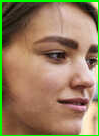

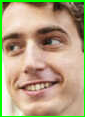

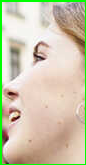

In [35]:
for face in faces:
  cv2_imshow(face)

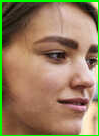

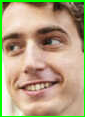

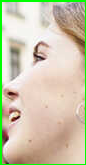

In [38]:
for i in range(len(faces)):
  ### PLOT AS FACES AQUI!
  cv2_imshow(faces[i])

In [41]:
def BLUR(img, boxes):
 ''' Função que retorna a imagem contendo o blur em cada face encontrada.'''
 boxes =boxes.xyxy.cpu().numpy()
 for box in boxes:

    ## ESCREVA O CÓDIGO AQUI!
    x1, y1, x2, y2 = map(int, box)
    img[y1:y2, x1:x2, :] = cv2.GaussianBlur(img[y1:y2, x1:x2, :], (15, 15), 0)

 return img


In [42]:
Blur_img = BLUR(img,boxes)

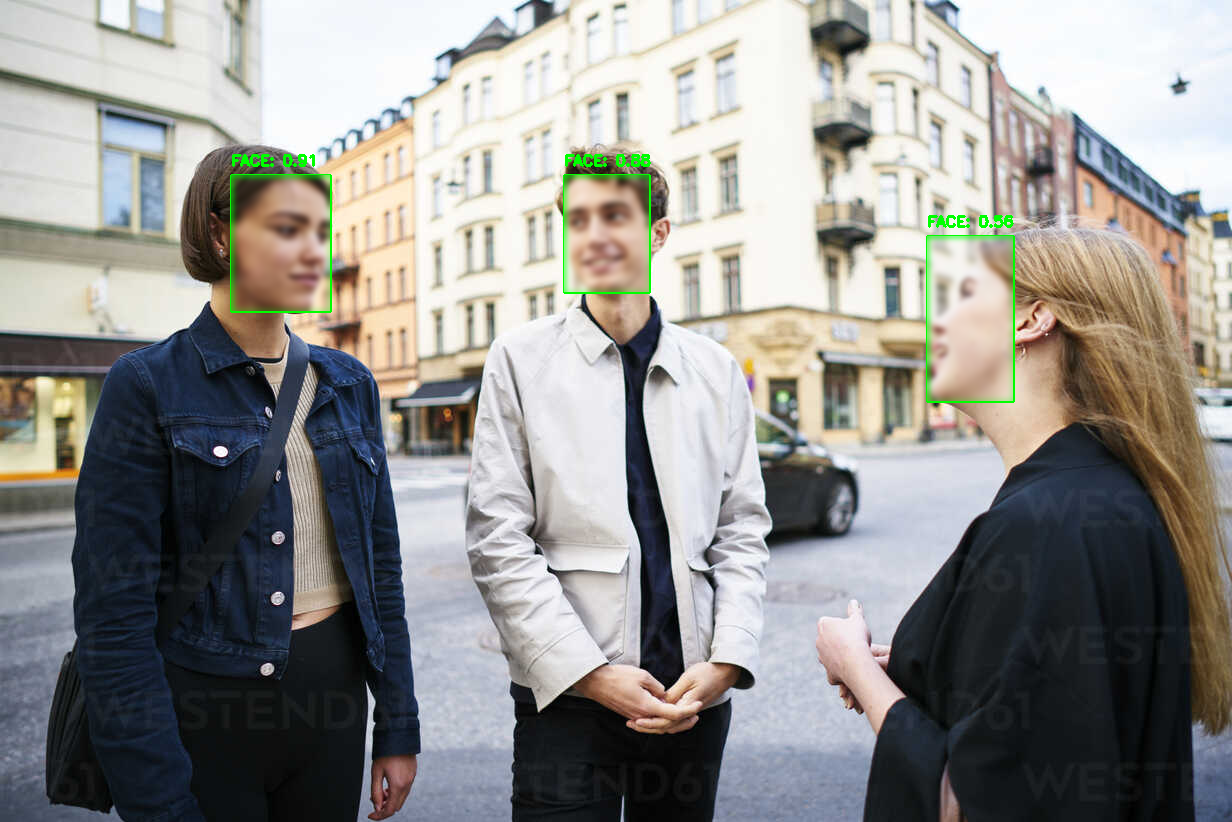

In [43]:
cv2_imshow(Blur_img)